# Flower Class Prediction 🌻

In [1]:
# Importing required libraries >>>

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Loading the Data 📑

In [3]:
# Loading the data >>>
df = pd.read_csv('Flowers.csv')

In [4]:
# Head of dataset >>
df.head()

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species
0,4694,17,1609,3.0,5.0,7,48
1,781,7,1380,4.0,17.0,2,54
2,21014,6,1122,3.0,11.0,1,22
3,7326,6,556,3.0,34.0,7,25
4,13122,17,1752,5.0,16.0,2,128


# Exploring the Data ⚡

In [5]:
# Get overview of Data >>
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12666 entries, 0 to 12665
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area_Code      12666 non-null  int64  
 1   Locality_Code  12666 non-null  int64  
 2   Region_Code    12666 non-null  int64  
 3   Height         12666 non-null  float64
 4   Diameter       12666 non-null  float64
 5   Class          12666 non-null  int64  
 6   Species        12666 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 692.8 KB


In [6]:
# 12k Rows & 7 Columns >>
df.shape

(12666, 7)

In [7]:
# Multiclass Classification Problem >>> KNN >>

In [8]:
pd.DataFrame({'Counts':df['Class'].value_counts()})

,Counts
3,3730
6,3425
2,2473
1,1112
7,1092
0,710
5,70
4,54


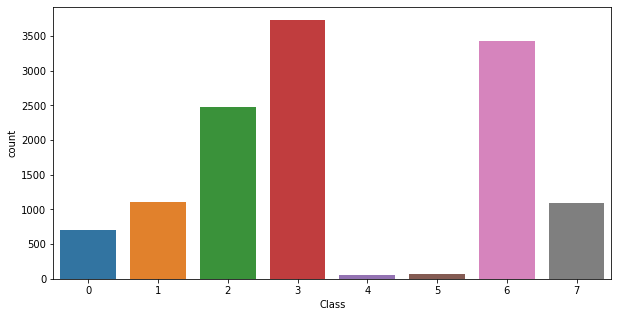

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='Class',data=df);

<AxesSubplot:>

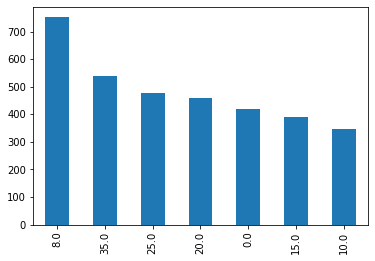

In [10]:
df['Diameter'].value_counts()[:10].plot(kind="bar")

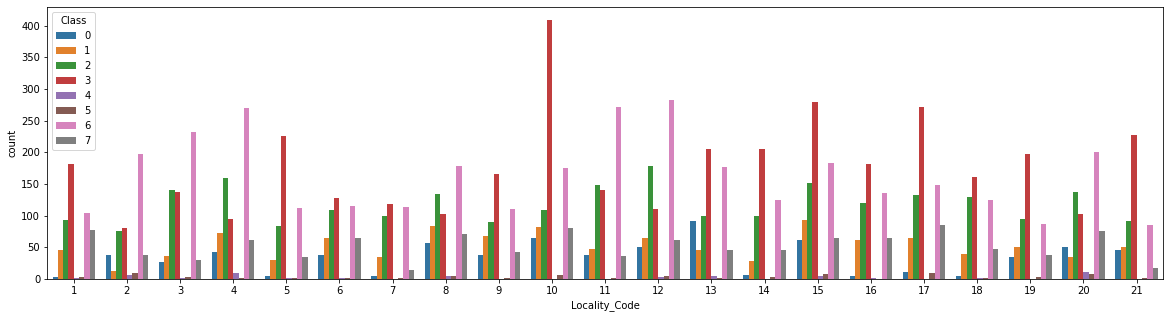

In [11]:
plt.figure(figsize=(20,5))
sns.countplot(x='Locality_Code',data=df,hue='Class');

# Preprocessing

<AxesSubplot:>

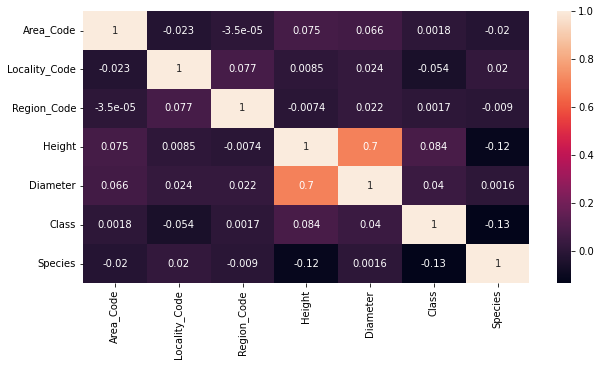

In [12]:
# Feature Selection >>
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [13]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(['Class'],axis=1)
Y = df['Class']

Importances = mutual_info_classif(X,Y)

<AxesSubplot:>

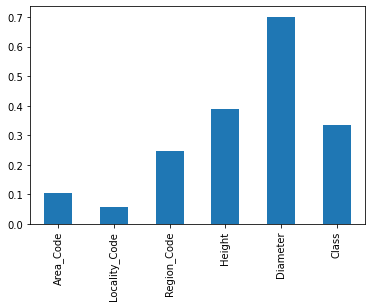

In [14]:
pd.Series(Importances,df.columns[0:len(df.columns)-1]).plot(kind="bar")

In [15]:
# Without Standard Scalar >>>

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [17]:
knn.score(X_test,Y_test)

0.30189423835832674

In [18]:
from sklearn.metrics import accuracy_score

Y_Pred = knn.predict(X_test)

accuracy_score(Y_test,Y_Pred)

0.30189423835832674

In [19]:
# calculating the accuracy of models with different values of k >>

mean_acc = np.zeros(20)

for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = accuracy_score(Y_test, yhat)

mean_acc

array([0.34293607, 0.31254933, 0.29873717, 0.308603  , 0.29913181,
       0.3074191 , 0.31018153, 0.308603  , 0.30189424, 0.3074191 ,
       0.31057616, 0.30820837, 0.31176006, 0.3062352 , 0.3121547 ,
       0.30702447, 0.31294396, 0.31491713, 0.31570639, 0.31610103])

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [21]:
sc.fit(X_train)

StandardScaler()

In [22]:
sc.mean_

array([1.57750668e+04, 1.12393407e+01, 1.09630537e+03, 5.60611923e+00,
       2.91103435e+01, 1.43590209e+02])

In [23]:
X_train.describe()

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Species
count,10132.000000,10132.000000,10132.000000,10132.000000,10132.000000,10132.000000
mean,15775.066818,11.239341,1096.305369,5.606119,29.110343,143.590209
std,9519.323660,5.803707,631.103973,3.562501,21.595126,80.040186
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6515.750000,6.000000,565.750000,3.000000,13.000000,71.000000
50%,15573.000000,11.000000,1091.500000,5.000000,25.000000,172.000000
75%,25220.750000,16.000000,1635.000000,7.500000,39.000000,203.000000
max,30893.000000,21.000000,2184.000000,60.000000,180.000000,262.000000


In [24]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [25]:
X_train.head()

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Species
6408,19724,18,127,3.0,11.0,35
3736,10618,19,1758,3.0,15.0,225
10661,12438,15,550,7.5,39.0,172
6313,5783,2,794,7.5,55.0,203
9170,15705,12,1212,3.0,7.0,22


In [26]:
type(X_train_sc)

numpy.ndarray

In [27]:
X_train_sc = pd.DataFrame(X_train_sc,columns=['Area_Code','Locality_Code','Region_Code','Height','Diameter','Species'])
X_test_sc = pd.DataFrame(X_test_sc,columns=['Area_Code','Locality_Code','Region_Code','Height','Diameter','Species'])

In [28]:
X_train_sc.head()

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Species
0,0.414854,1.164944,-1.535964,-0.731578,-0.838672,-1.356763
1,-0.541774,1.337256,1.048523,-0.731578,-0.653436,1.017162
2,-0.350574,0.648007,-0.865677,0.531642,0.457980,0.354962
3,-1.049713,-1.592051,-0.479034,0.531642,1.198925,0.742286
4,-0.007361,0.131071,0.183330,-0.731578,-1.023909,-1.519189


In [29]:
X_train_sc.describe().round(2)

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Species
count,10132.00,10132.00,10132.00,10132.00,10132.00,10132.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.66,-1.76,-1.74,-1.57,-1.35,-1.79
25%,-0.97,-0.90,-0.84,-0.73,-0.75,-0.91
50%,-0.02,-0.04,-0.01,-0.17,-0.19,0.35
75%,0.99,0.82,0.85,0.53,0.46,0.74
max,1.59,1.68,1.72,15.27,6.99,1.48


In [30]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_sc,Y_train)

Y_Pred = knn.predict(X_test)

accuracy_score(Y_test,Y_Pred)

0.2888713496448303

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,Y_train)

RandomForestClassifier()

In [32]:
rf.score(X_test,Y_test)

0.686266771902131

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_sc,Y_train)

RandomForestClassifier()

In [34]:
rf.score(X_test_sc,Y_test)

0.6677190213101816

In [35]:
import numpy as np

# HyperParameter Tuning >>
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [36]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,Y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [38]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [39]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 1400,min_samples_split=2,min_samples_leaf=1,max_depth=100,bootstrap=True,random_state = 42)
base_model.fit(X_train,Y_train)
base_accuracy = evaluate(base_model, X_test,Y_test)

Model Performance
Average Error: 0.9858 degrees.
Accuracy = -inf%.


In [40]:
base_model = RandomForestClassifier(n_estimators = 1400,min_samples_split=2,min_samples_leaf=1,max_depth=100,bootstrap=True,random_state = 42)
base_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=100, n_estimators=1400, random_state=42)

In [41]:
base_model.score(X_test,Y_test)

0.6850828729281768